#                       TRIAL     SMS SPAM DETECTION

# Import Statements

In [27]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

[nltk_data] Error loading stopwords: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authentication Required>
[nltk_data] Error loading stopwords: <urlopen error [Errno 110]
[nltk_data]     Connection timed out>


In [1]:
import pandas as pd


import numpy as np

import matplotlib.pyplot as plt

from nltk.corpus import stopwords   #Stopword required to neglect them in the text

import nltk

from sklearn.feature_extraction.text import CountVectorizer


from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB

from sklearn import tree

In [63]:
nltk.download('stopwords')

False

# Reading the Dataset

In [2]:
data = pd.read_csv("spam.csv", encoding='latin')

In [3]:
data['mapped_data'] = data['v1'].map({'ham':0, 'spam':1})
ham=data[data.mapped_data == 0]
print("Number of ham messages in data set :", ham['v1'].count())
spam = data[data.mapped_data == 1]
print("Number of spam messages in data set: ", spam['v1'].count())


('Number of ham messages in data set :', 4825)
('Number of spam messages in data set: ', 747)


# Visualization Of Data

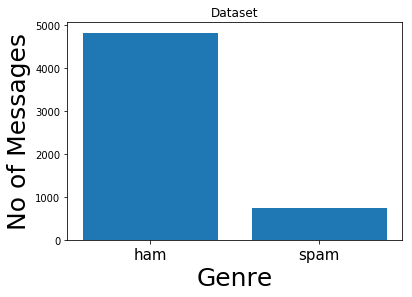

In [4]:
label = ['ham', 'spam']
no_of_messages = [ham['v1'].count(), spam['v1'].count()]
index = np.arange(len(label))
plt.bar(index, no_of_messages)
plt.xlabel('Genre', fontsize=25)
plt.ylabel('No of Messages', fontsize=25)
plt.xticks(index, label, fontsize=15)
plt.title('Dataset')
plt.show()

# Preprocessing the Data 

In [5]:
df2 = data[data['v1'] == 'ham']
df2 = df2[0:825]

In [6]:
df3 = data[data['v1'] == 'spam']

In [7]:
df4 =  pd.concat([df3, df2])

In [8]:
df5 = (df4.sort_values(['v2']))

In [26]:
df5

,v1,v2
641,ham,"said kiss, kiss, i can't do the sound effects..."
354,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
3989,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
4901,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4861,spam,**FREE MESSAGE**Thanks for using the Auction S...
2123,spam,+123 Congratulations - in this week's competit...
504,spam,+123 Congratulations - in this week's competit...
716,spam,+449071512431 URGENT! This is the 2nd attempt ...
163,spam,-PLS STOP bootydelious (32/F) is inviting you ...
42,spam,07732584351 - Rodger Burns - MSG = We tried to...


In [24]:
df5 = df5[['v1', 'v2']]

In [28]:
df5.to_csv('newspam.csv', sep = ',', index = False)

# Reading the New Dataset

In [52]:
data = pd.read_csv("newspam.csv", encoding='latin')

# Transforming the Data

# Map the Column v1 -  ham to 0 and spam to 1 respectively

In [53]:
data

,v1,v2
0,ham,"said kiss, kiss, i can't do the sound effects..."
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,spam,**FREE MESSAGE**Thanks for using the Auction S...
5,spam,+123 Congratulations - in this week's competit...
6,spam,+123 Congratulations - in this week's competit...
7,spam,+449071512431 URGENT! This is the 2nd attempt ...
8,spam,-PLS STOP bootydelious (32/F) is inviting you ...
9,spam,07732584351 - Rodger Burns - MSG = We tried to...


In [54]:
data['mapped_data'] = data['v1'].map({'ham':0, 'spam':1})
data['mapped_data']

0       0
1       0
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      0
14      0
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      0
28      1
29      1
       ..
1542    1
1543    0
1544    1
1545    0
1546    1
1547    1
1548    1
1549    1
1550    1
1551    1
1552    0
1553    1
1554    0
1555    1
1556    0
1557    1
1558    1
1559    1
1560    1
1561    1
1562    1
1563    1
1564    1
1565    0
1566    0
1567    0
1568    0
1569    0
1570    0
1571    0
Name: mapped_data, Length: 1572, dtype: int64

In [55]:
data

,v1,v2,mapped_data
0,ham,"said kiss, kiss, i can't do the sound effects...",0
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.,0
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,1
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...,1
4,spam,**FREE MESSAGE**Thanks for using the Auction S...,1
5,spam,+123 Congratulations - in this week's competit...,1
6,spam,+123 Congratulations - in this week's competit...,1
7,spam,+449071512431 URGENT! This is the 2nd attempt ...,1
8,spam,-PLS STOP bootydelious (32/F) is inviting you ...,1
9,spam,07732584351 - Rodger Burns - MSG = We tried to...,1


# Head of the data - Verify Mapping

In [56]:
ham=data[data.mapped_data == 0]

In [57]:
ham

,v1,v2,mapped_data
0,ham,"said kiss, kiss, i can't do the sound effects...",0
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.,0
13,ham,1.20 that call cost. Which i guess isnt bad. M...,0
14,ham,10 min later k...,0
27,ham,4 oclock at mine. Just to bash out a flat plan.,0
38,ham,7 at esplanade.. Do Ã_ mind giving me a lift ...,0
40,ham,"8 at the latest, g's still there if you can sc...",0
52,ham,A famous quote : when you develop the ability ...,0
53,ham,"A gram usually runs like &lt;#&gt; , a half e...",0
55,ham,A swt thought: \Nver get tired of doing little...,0


In [58]:
print("Number of ham messages in data set :", ham['v1'].count())


In [59]:
spam = data[data.mapped_data == 1]

In [60]:
print("Number of spam messages in data set: ", spam['v1'].count())

# Visualization of Data

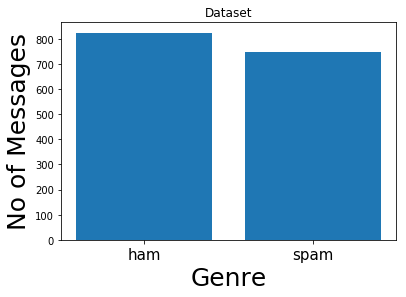

In [61]:
label = ['ham', 'spam']
no_of_messages = [ham['v1'].count(), spam['v1'].count()]
index = np.arange(len(label))
plt.bar(index, no_of_messages)
plt.xlabel('Genre', fontsize=25)
plt.ylabel('No of Messages', fontsize=25)
plt.xticks(index, label, fontsize=15)
plt.title('Dataset')
plt.show()

# Download Stopwords

In [62]:
nltk.download('stopwords')

False

# Removing Stopwords

In [64]:

stopset = set(stopwords.words("english"))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/nick/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


# Initializing Count Vectorizer

In [82]:
vectorizer = TfidfVectorizer()

In [83]:
X = vectorizer.fit_transform(data.v2)


In [84]:
y = data.mapped_data

# Splitting data for Training and Testing

In [85]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, train_size=0.7, random_state=None)


In [100]:
X_train[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [103]:
(X_train.shape[0])

1100

# Visualizing the Training and Test Data

In [86]:
print("Training set = {} samples.".format(X_train.shape[0]))
print("Testing set = {} samples.".format(X_test.shape[0]))

Training set = 1100 samples.
Testing set = 472 samples.


# Algorithms Used

In [87]:
algorithms = ('SVM', 'KNN','DecisionTree','NaiveBayes')

# Function to train the Model


In [88]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)

# Function to predict the class of the message 

In [89]:
def predict(model, features):
    return(model.predict(features))

# Initializing the Models

In [90]:
A = LinearSVC()
B = KNeighborsClassifier(n_neighbors=1)
C = tree.DecisionTreeClassifier()
D = GaussianNB()


In [91]:
model = [A,B,C,D]
acc_score  = [0,0,0,0]

# Running the Models

In [92]:
for i in range(0,4):
     print(algorithms[i])
     if(i != 3):   
         train_model(model[i], X_train, y_train)
         y_pred = predict(model[i], X_test)
     else:
         train_model(model[i], X_train.toarray(), y_train)
         y_pred = predict(model[i], X_test.toarray())
     acc_score[i] = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
     print("Accuracy in %:",acc_score[i]*100)
     print("\n")

SVM
Accuracy in %: 95.97457627118644


KNN
Accuracy in %: 93.4322033898305


DecisionTree
Accuracy in %: 91.73728813559322


NaiveBayes
Accuracy in %: 93.4322033898305




# Comparison of Models 

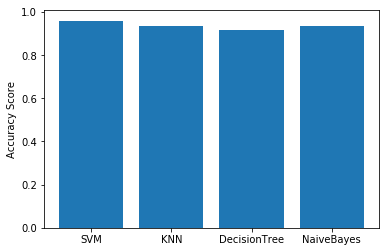

In [93]:
index = np.arange(len(algorithms))
value = [i for i in acc_score]
plt.bar(index, value)
plt.xticks(index, algorithms)
plt.ylabel('Accuracy Score')
plt.show()

# User Input

In [94]:
print(vectorizer.vocabulary_)

{'said': 3569, 'kiss': 2501, 'can': 1262, 'do': 1659, 'the': 4097, 'sound': 3829, 'effects': 1741, 'he': 2195, 'is': 2401, 'gorgeous': 2102, 'man': 2724, 'isn': 2405, 'kind': 2496, 'of': 3036, 'person': 3177, 'who': 4521, 'needs': 2951, 'smile': 3781, 'to': 4164, 'brighten': 1184, 'his': 2241, 'day': 1563, 'lt': 2673, 'gt': 2136, 'ish': 2403, 'minutes': 2818, 'was': 4457, 'ago': 818, 'wtf': 4599, 'bank': 1012, 'granite': 2119, 'issues': 2408, 'strong': 3933, 'buy': 1224, 'explosive': 1831, 'pick': 3196, 'for': 1959, 'our': 3111, 'members': 2784, 'up': 4323, 'over': 3117, '300': 446, 'nasdaq': 2933, 'symbol': 4018, 'cdgt': 1298, 'that': 4093, '00': 0, 'per': 3169, 'free': 1976, 'polyphonic': 3264, 'ringtone': 3519, 'text': 4076, 'super': 3986, '87131': 689, 'get': 2053, 'your': 4650, 'poly': 3259, 'tone': 4179, 'week': 4486, 'now': 3009, '16': 353, 'sn': 3793, 'pobox202': 3243, 'nr31': 3012, '7zs': 625, 'subscription': 3956, '450pw': 520, 'message': 2791, 'thanks': 4089, 'using': 4355, 

In [95]:
text = input("Enter a Message : ")

Enter a Message : 100 $ waiting for you !! Just Call +91122234455445


In [109]:
vector = vectorizer.transform([text])
#vector.toarray()
#vector.get_feature_names()
#vector.inverse_transform(a[0])
#x_train.iloc[0]
for i in range(0,4):
    print("\n")
    if(i != 3):   
         y_pred = predict(model[i],vector)
    else:
         y_pred = predict(model[i], vector.toarray())
    if y_pred == 0:
        print(algorithms[i]+" : Ham")
    else:
        print(algorithms[i]+" : Spam")
    print("\n")
    



SVM : Ham




KNN : Ham




DecisionTree : Ham




NaiveBayes : Spam


